In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

import sys
import os
import time
import numpy as n

from collections import OrderedDict
import time
import gc

Populating the interactive namespace from numpy and matplotlib


In [97]:
from sigutils import *

In [4]:

def secs_to_sample(seconds): return n.int(seconds/period)

In [41]:
directory = 'recordings'
filename = ['es_pipe_', '_quaddemod_lpf_10.0lpf2_10.0']
chars = ['!','U','@']

In [42]:
recordings = {}
recordings_raw = {}
for char in chars:
#     print char
    recordings_raw[char] = n.fromfile(os.path.join(directory, filename[0] + char + filename[1]), dtype=n.float32)

In [43]:

sample_rate = 4.0032e6
period = 1.0/sample_rate


In [80]:

recordings['U'] = recordings_raw['U'][secs_to_sample(1.582):secs_to_sample(1.592)]
recordings['!'] = recordings_raw['!'][secs_to_sample(0.83361):secs_to_sample(0.84361)]
recordings['@'] = recordings_raw['@'][secs_to_sample(1.66923):secs_to_sample(1.67923)]

(0, 30)

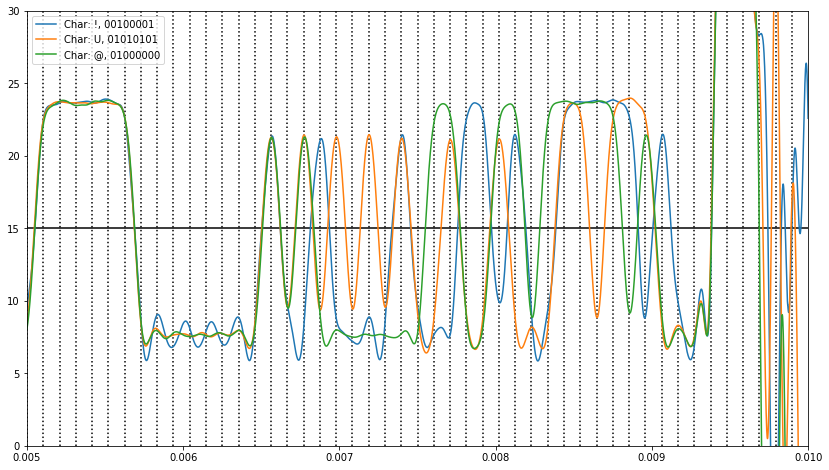

In [93]:
n_samples = recordings[chars[0]].shape[0]
sample_rate = 4.0032e6
period = 1.0/sample_rate

baudrate = 9600
baud_period = 1.0/float(baudrate)

fig = plt.figure(figsize=(14,8))
ts = n.arange(0, period * n_samples, period)

start = 0
stop = n_samples
for char in chars:
    plot(ts[start:stop],recordings[char][start:stop], label="Char: " + str(char) + ', %.8d' % int(bin(ord(char))[2:]))
time = linspace
for i in range(int((n_samples*period)/baud_period)):
    plt.vlines(i*baud_period, 0, 100, linestyles='dotted')

level=15
plt.hlines(level, 0, n_samples*period)
plt.xlim(n_samples*period/2, n_samples*period)
plt.legend(loc='upper left')
plt.ylim(0,30)

In [94]:
bits = {}
phase_delay = 0.0
for char in chars:
    bits[char] = ''
    t = 0
    while t < n_samples*period:
        bits[char] += '1' if recordings[char][secs_to_sample(t)] > level else '0'
        t += baud_period

In [95]:
bits

{'!': '011111111010101010101010101010101010101010101010011111100000000100100001000110100111110100011101',
 '@': '011111111010101010101010101010101010101010101010011111100000000101000000011001101111101000011000',
 'U': '011111111010101010101010101010101010101010101010011111100000000101010101001001000110111000011111'}